Data Analytics Experiment 1: Exploratory Data Analysis



Name: Anuj Chavan    UID: 2019120012    Date: 07/09/2022




Aim: To perform EDA for dataset of agricultural raw materials.

Step 1: We import all the required libraries necessary for our analysis. Pandas, Numpy and Matplotlib are some of the libraries used to manage large dataframes and datasets. Seaboarn is a visualization library and gives us the ability to visualize data into graphs.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Step 2: Importing our dataset as a dataframe and gathering information about our data.

We peek at the data using the .head() command. Similarly we find information, the number of featureas and the number of data samples using the .columns() and .shape() methods. The .info() method gives the entire description of the columns along with the details of their data types and null values.

In [ ]:
data = pd.read_csv('agricultural_raw_material.csv')
data.head()

,Month,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
0,Apr-90,482.34,-,236,-,1.83,-,"1,071.63",-,161.20,...,312.36,-,0.84,-,120.66,-,218.76,-,829.29,-
1,May-90,447.26,-7.27%,234,-0.85%,1.89,3.28%,"1,057.18",-1.35%,172.86,...,350.12,12.09%,0.85,1.19%,124.28,3.00%,213.00,-2.63%,842.51,1.59%
2,Jun-90,440.99,-1.40%,216,-7.69%,1.99,5.29%,898.24,-15.03%,181.67,...,373.94,6.80%,0.85,0.00%,129.45,4.16%,200.00,-6.10%,831.35,-1.32%
3,Jul-90,418.44,-5.11%,205,-5.09%,2.01,1.01%,895.83,-0.27%,187.96,...,378.48,1.21%,0.86,1.18%,124.23,-4.03%,210.05,5.03%,798.83,-3.91%
4,Aug-90,418.44,0.00%,198,-3.41%,1.79,-10.95%,951.22,6.18%,186.13,...,364.60,-3.67%,0.88,2.33%,129.70,4.40%,208.30,-0.83%,818.74,2.49%


In [ ]:
data.shape

(361, 13)

In [ ]:
data.columns

Index(['Month', 'Coarse wool Price', 'Copra Price', 'Cotton Price',
       'Fine wool Price', 'Hard log Price', 'Hard sawnwood Price',
       'Hide Price', 'Plywood Price', 'Rubber Price', 'Softlog Price',
       'Soft sawnwood Price', 'Wood pulp Price'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361 entries, 0 to 360
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Month                361 non-null    object 
 1   Coarse wool Price    327 non-null    float64
 2   Copra Price          339 non-null    float64
 3   Cotton Price         361 non-null    float64
 4   Fine wool Price      327 non-null    float64
 5   Hard log Price       361 non-null    float64
 6   Hard sawnwood Price  327 non-null    float64
 7   Hide Price           327 non-null    float64
 8   Plywood Price        361 non-null    float64
 9   Rubber Price         361 non-null    float64
 10  Softlog Price        327 non-null    float64
 11  Soft sawnwood Price  327 non-null    float64
 12  Wood pulp Price      360 non-null    float64
dtypes: float64(12), object(1)
memory usage: 36.8+ KB


In [ ]:
data.isnull().sum()

Month                   0
Coarse wool Price      34
Copra Price            22
Cotton Price            0
Fine wool Price        34
Hard log Price          0
Hard sawnwood Price    34
Hide Price             34
Plywood Price           0
Rubber Price            0
Softlog Price          34
Soft sawnwood Price    34
Wood pulp Price         1
dtype: int64

Step 3: Data Cleaning

We see that our data consists of columns which are not numbers. The percent sign is not recognized as a number hence we try to delete the sign from the numbers and create floating values from it. We see that a few of the columns are made up of object values. We convert these object values to float. Further we see alot of null values for which which drop them.

In [ ]:
for i in list(data.columns)[2::2]:
       data = data.drop(i, axis=1)
       

data = data.replace(',', '', regex=True)

In [ ]:
data.head()

,Month,Coarse wool Price,Copra Price,Cotton Price,Fine wool Price,Hard log Price,Hard sawnwood Price,Hide Price,Plywood Price,Rubber Price,Softlog Price,Soft sawnwood Price,Wood pulp Price
0,Apr-90,482.34,236,1.83,1071.63,161.20,549.91,100.00,312.36,0.84,120.66,218.76,829.29
1,May-90,447.26,234,1.89,1057.18,172.86,491.88,99.46,350.12,0.85,124.28,213.00,842.51
2,Jun-90,440.99,216,1.99,898.24,181.67,495.39,97.90,373.94,0.85,129.45,200.00,831.35
3,Jul-90,418.44,205,2.01,895.83,187.96,485.86,96.75,378.48,0.86,124.23,210.05,798.83
4,Aug-90,418.44,198,1.79,951.22,186.13,487.52,91.89,364.60,0.88,129.70,208.30,818.74


In [ ]:
# Conversion to numbers from the object types
data['Coarse wool Price'] = data['Coarse wool Price'].astype(float)
data['Copra Price'] = data['Copra Price'].astype(float)
data['Fine wool Price'] = data['Fine wool Price'].astype(float)

In [ ]:
# Dropping null and empty sets
data =data.dropna()

,Month,Coarse wool Price,Copra Price,Cotton Price,Fine wool Price,Hard log Price,Hard sawnwood Price,Hide Price,Plywood Price,Rubber Price,Softlog Price,Soft sawnwood Price,Wood pulp Price
0,Apr-90,482.34,236.00,1.83,1071.63,161.20,549.91,100.00,312.36,0.84,120.66,218.76,829.29
1,May-90,447.26,234.00,1.89,1057.18,172.86,491.88,99.46,350.12,0.85,124.28,213.00,842.51
2,Jun-90,440.99,216.00,1.99,898.24,181.67,495.39,97.90,373.94,0.85,129.45,200.00,831.35
3,Jul-90,418.44,205.00,2.01,895.83,187.96,485.86,96.75,378.48,0.86,124.23,210.05,798.83
4,Aug-90,418.44,198.00,1.79,951.22,186.13,487.52,91.89,364.60,0.88,129.70,208.30,818.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,Feb-17,1029.58,1146.25,1.88,1368.14,263.45,680.49,76.58,483.23,2.71,157.58,287.43,875.00
323,Mar-17,1059.60,1016.00,1.91,1454.83,263.48,672.48,77.93,483.27,2.35,160.05,300.42,875.00
324,Apr-17,991.12,1044.00,1.92,1404.98,270.34,688.44,75.43,495.87,2.21,159.84,306.60,875.00
325,May-17,1019.95,1112.50,1.95,1433.47,265.28,704.52,69.36,486.59,2.10,159.84,306.60,875.00


Step 4: Visualization and Analysis

We plot various graphs over our data. We plot the distplot, pairplot, catplot, boxplot, heatmap for our data. These plots help us to understand various relationships between the attributes of our data.

In [ ]:
sns.set()
sns.set_style('whitegrid')

In [ ]:
# The distplot gives us the general distribution of the attibutes of our data. 
# Here we can see the various distribution of the raw materials.
n_rows = 6
n_cols = 2

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols)

for i, column in enumerate(list(data.columns)[1:]):
    sns.distplot(data[column], ax=axes[i//n_cols, i%n_cols])

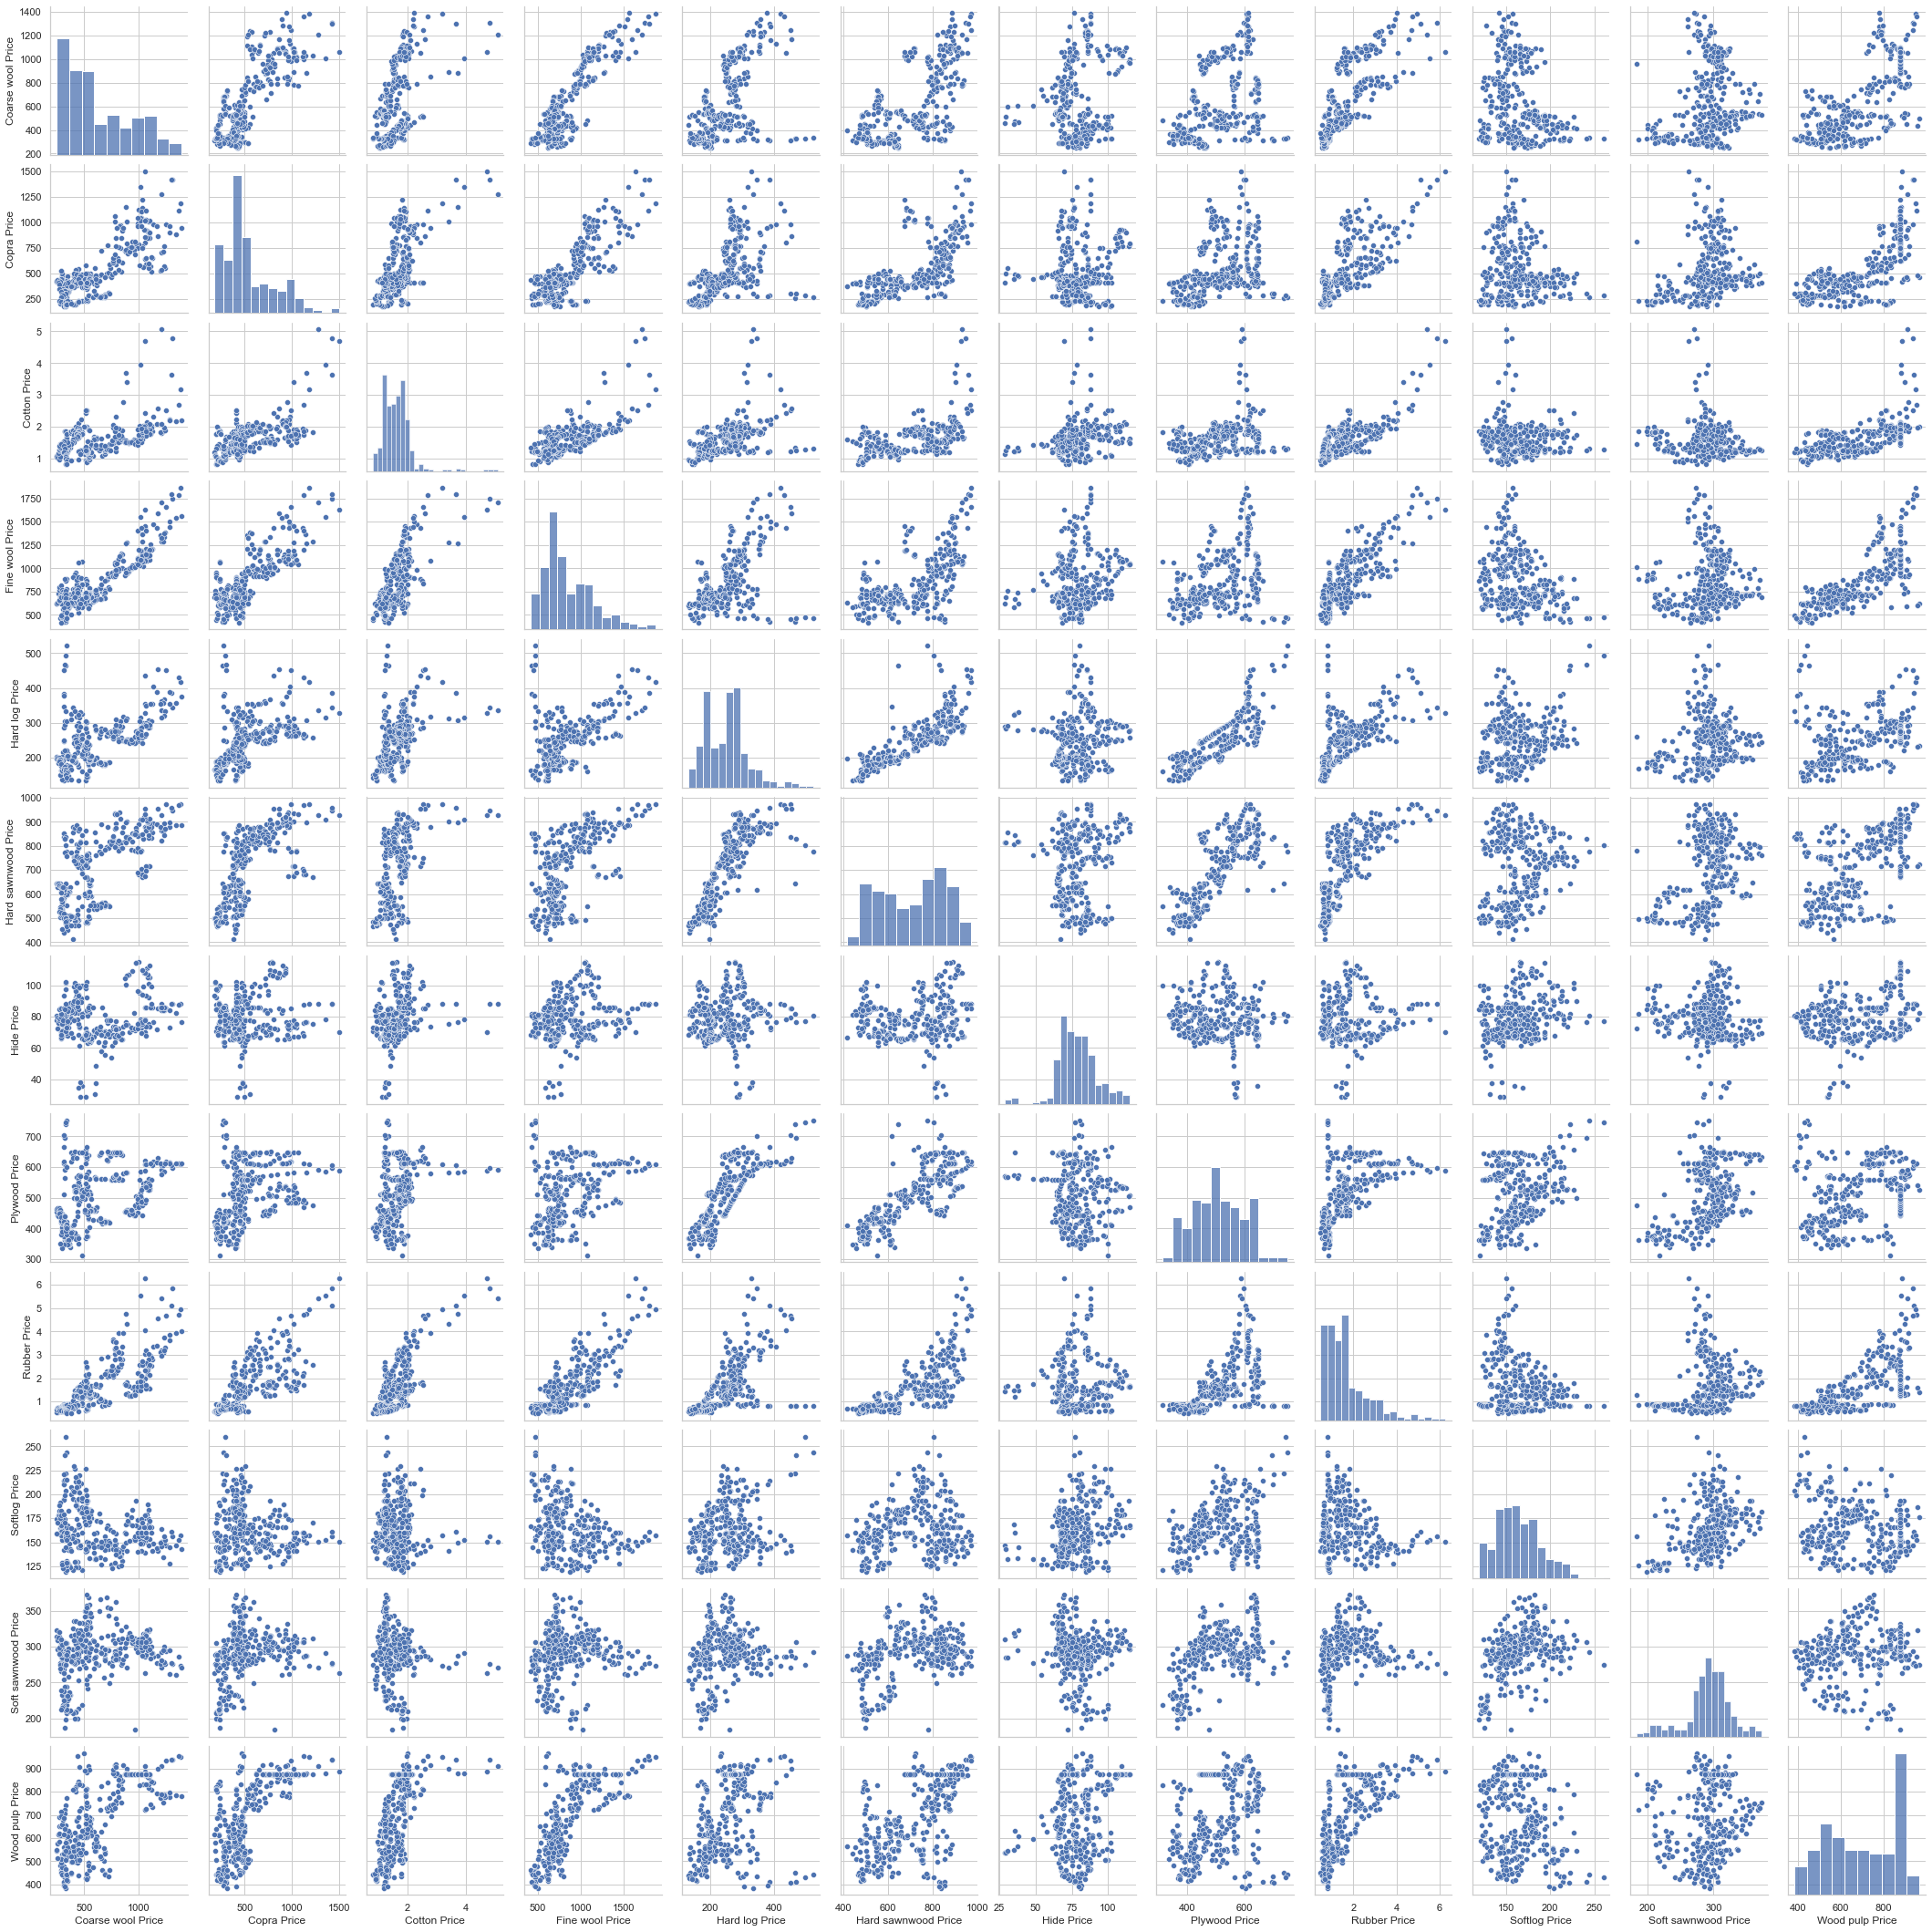

In [ ]:
# Pairplot is the most useful graph in Python. It gives a relationship between every attribute and
# every other attribute of our dataset. We can then observe relationships between any two attributes.
sns.pairplot(data)

# In our case we see relationships emerging from various raw materials. We see direct relationships 
# between fiber prices. Similarly we see a relation between various wood prices. Rubber and wood pulp
# can be seen to have a relationship with wood.

<AxesSubplot:>

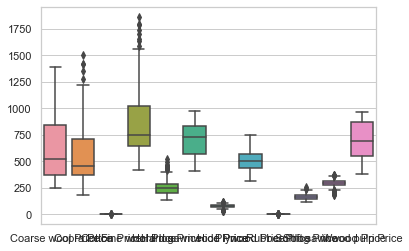

In [ ]:
# Box plot helps us to understand how our data is distributed. We see various prices of the raw
# materials, their averages, the outliers. Similarly we can estimate the minimum and maximum prices
# of most of the raw materials.
sns.boxplot(data)

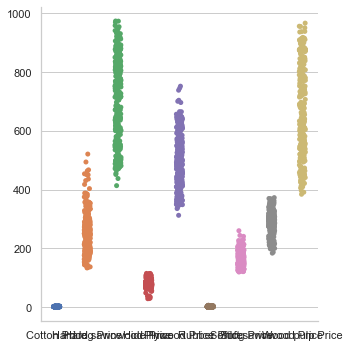

In [ ]:
# A catplot here gives the mapping of our data sets depending on our attributes. We can see the prices
# and the general spread of our datapoints on this graph.
sns.catplot(data)

<AxesSubplot:>

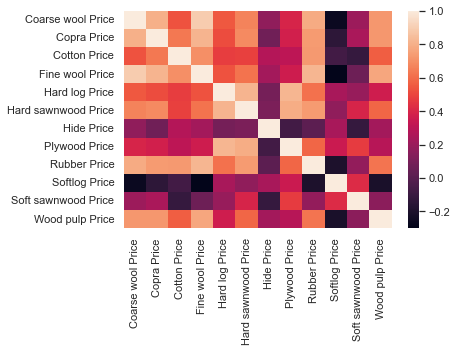

In [ ]:
# Heatmap again is one of the important plots in seaborn library. It gives us a measure of correlation
# between different attributes of our dataset. A correlation coefficient of 1 means a complete 
# dependence while that of 0 represents no relation. We try to find various relations from this graph.
sns.heatmap(data.corr())

Inferences: 

Raw data is unclean and needs extensive cleaning to be able to fit the data properly. Cleaning allows patterns to emerge and redundancy to decrease. Null values can be either dropped or can be altered to contain the mean, median or mode of the data depending on the conditions that suit the needs. Various columns need to be modified to a specific datatype and require conversion.

Graphs from seaborn such as distplot, boxplot, catplot, pairplot, heatmaps allow us to observe and analyze data carefully and easily. Graphs allow us to visualize relations that occur with the data and we can take inferences about our data from them. In this example, we see a strong relationships between coarse wool prices, fine wool prices. Similary copra and cotton have a weak relation but they do depend on wool. We see soft sawnwood nearly does not depend on the fiber prices. Whereas all woods, rubber and pulp depend moderately on the other wood and log prices.